In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import ks_2samp
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import KBinsDiscretizer

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# 1. Data Collection

In [3]:
data = pd.read_csv("tips.csv", sep=";")

# 2. Pre-Exploratory Data Analysis

## 2.1 Compréhension des données

In [4]:
data.head()

,IDEN,TOTBILL,TIP,SEX,SMOKER,DAY,TIME,SIZE
0,R001,"16,99","1,01",1,0,6,1,2
1,R002,"10,34","1,66",0,0,6,1,3
2,R003,"21,01","3,50",0,0,6,1,3
3,R004,"23,68","3,31",0,0,6,1,2
4,R005,"24,59","3,61",1,0,6,1,4


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   IDEN     244 non-null    object
 1   TOTBILL  244 non-null    object
 2   TIP      244 non-null    object
 3   SEX      244 non-null    int64 
 4   SMOKER   244 non-null    int64 
 5   DAY      244 non-null    int64 
 6   TIME     244 non-null    int64 
 7   SIZE     244 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 15.4+ KB


In [6]:
data.describe()

,SEX,SMOKER,DAY,TIME,SIZE
count,244.000000,244.000000,244.000000,244.000000,244.000000
mean,0.356557,0.381148,4.725410,0.721311,2.569672
std,0.479967,0.486667,1.155774,0.449276,0.951100
min,0.000000,0.000000,3.000000,0.000000,1.000000
25%,0.000000,0.000000,3.000000,0.000000,2.000000
50%,0.000000,0.000000,5.000000,1.000000,2.000000
75%,1.000000,1.000000,6.000000,1.000000,3.000000
max,1.000000,1.000000,6.000000,1.000000,6.000000


In [7]:
for col in ["SEX", "SMOKER", "DAY", "TIME"]:
    print(data[col].value_counts())
    print("\n")

0    157
1     87
Name: SEX, dtype: int64


0    151
1     93
Name: SMOKER, dtype: int64


5    87
6    76
3    62
4    19
Name: DAY, dtype: int64


1    176
0     68
Name: TIME, dtype: int64




## 2.2 Analyse univariée

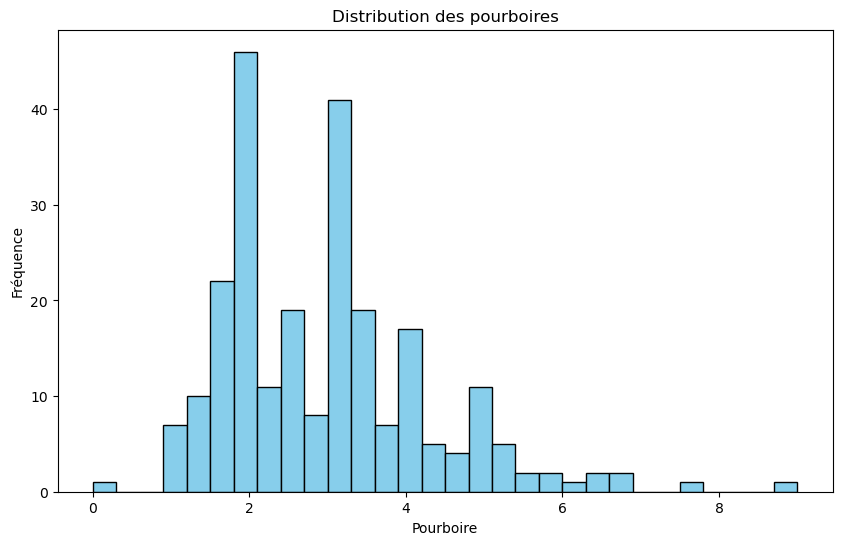

In [8]:
plt.figure(figsize=(10,6))
data["TIP"].str.replace(',', '.').astype(float).plot(kind="hist", bins=30, color="skyblue", edgecolor="black")
plt.title("Distribution des pourboires")
plt.xlabel("Pourboire")
plt.ylabel("Fréquence")
plt.show()

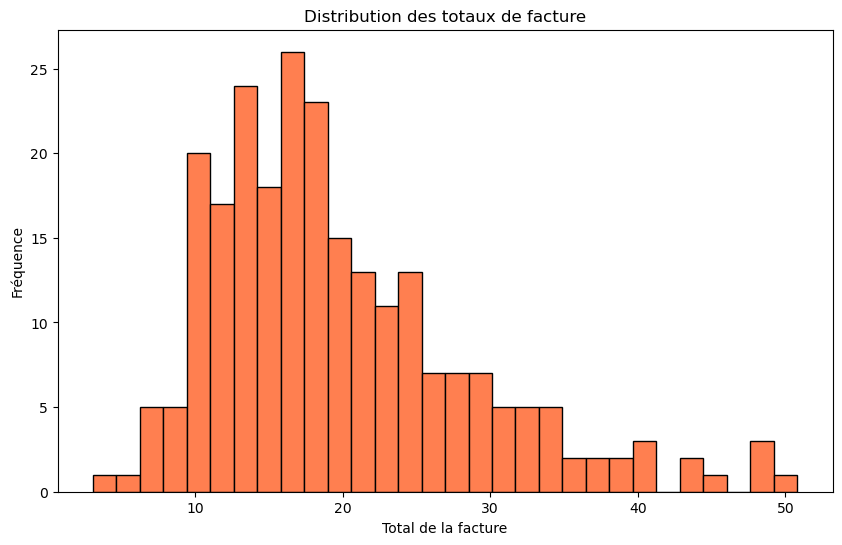

In [9]:
plt.figure(figsize=(10,6))
data["TOTBILL"].str.replace(',', '.').astype(float).plot(kind="hist", bins=30, color="coral", edgecolor="black")
plt.title("Distribution des totaux de facture")
plt.xlabel("Total de la facture")
plt.ylabel("Fréquence")
plt.show()

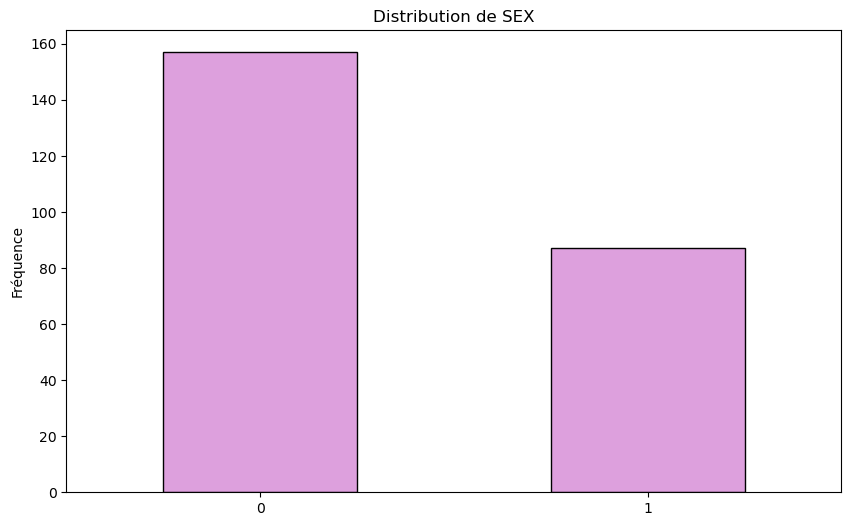

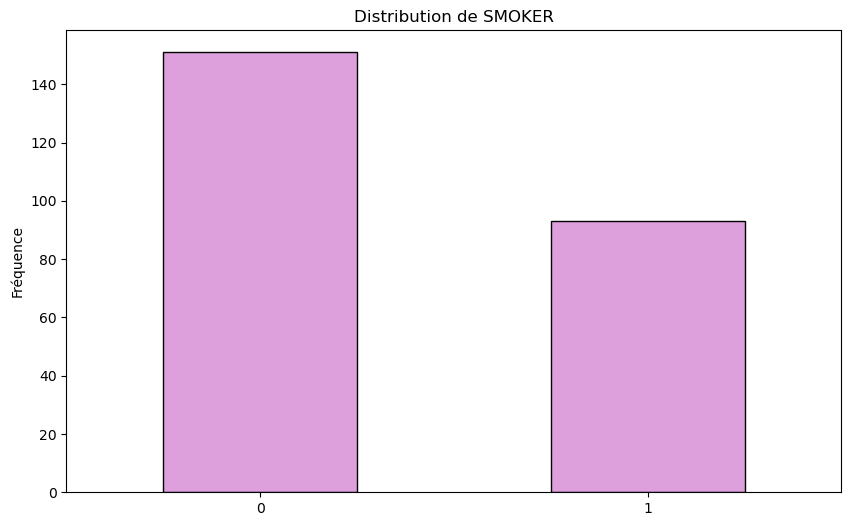

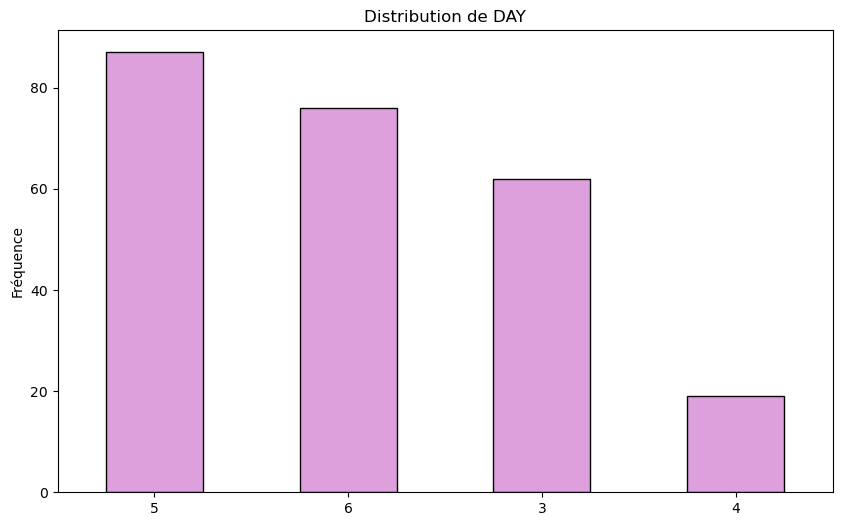

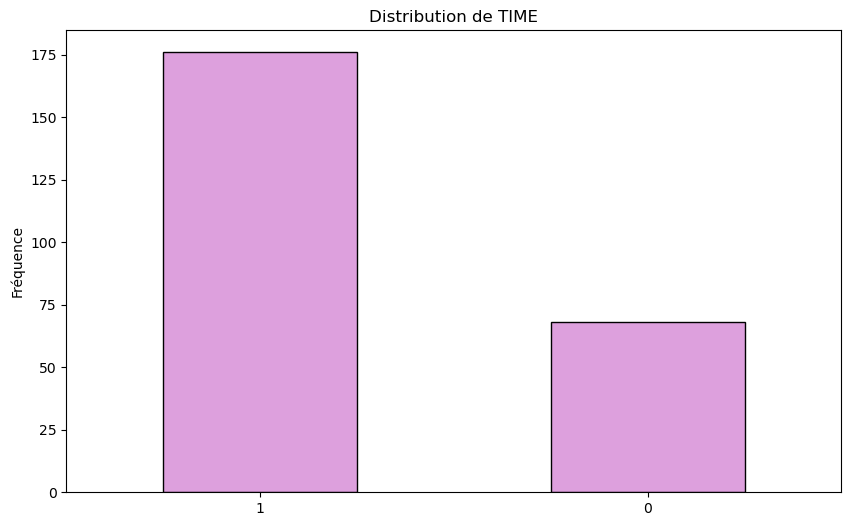

In [10]:
for col in ["SEX", "SMOKER", "DAY", "TIME"]:
    plt.figure(figsize=(10,6))
    data[col].value_counts().plot(kind="bar", color="plum", edgecolor="black")
    plt.title(f"Distribution de {col}")
    plt.ylabel("Fréquence")
    plt.xticks(rotation=0)
    plt.show()

## 2.3 Analyse bivariée

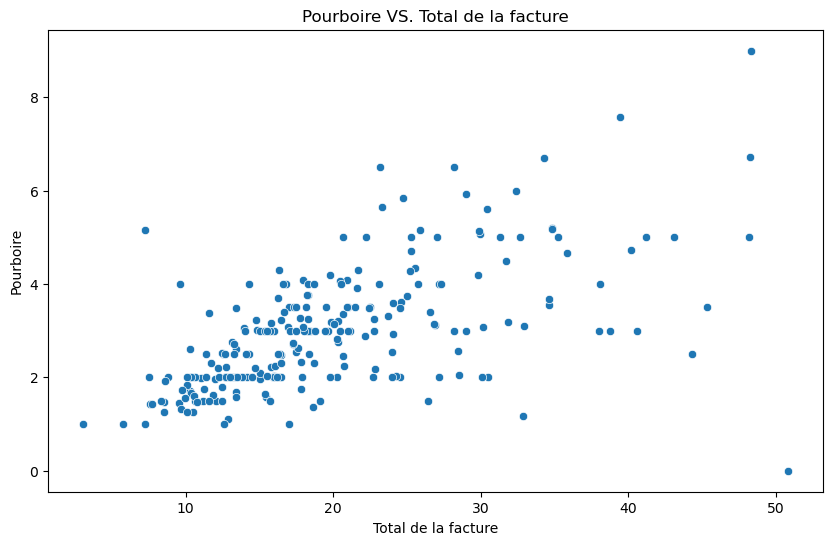

In [11]:
# Pourboire VS. Total de la facture
plt.figure(figsize=(10,6))
sns.scatterplot(
    x=data["TOTBILL"].str.replace("," , ".").astype(float), 
    y=data["TIP"].str.replace(",", ".").astype(float)
)
plt.title("Pourboire VS. Total de la facture")
plt.xlabel("Total de la facture")
plt.ylabel("Pourboire")
plt.show()

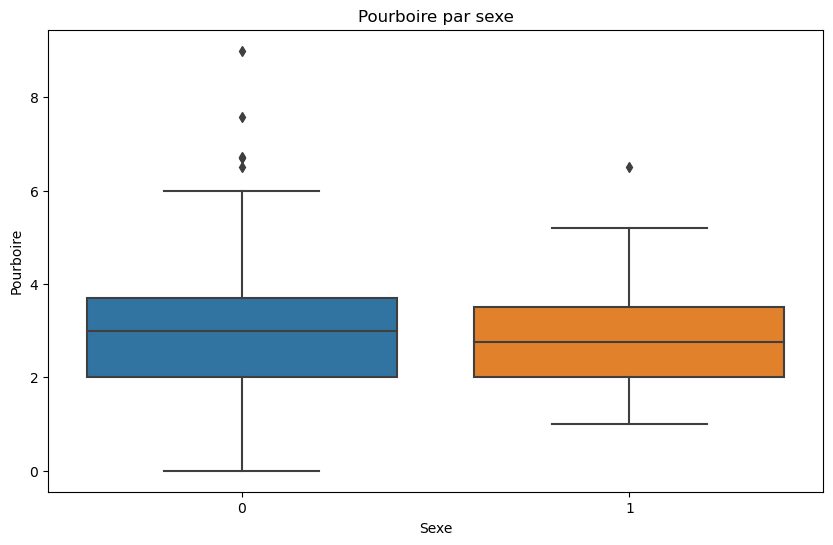

In [12]:
# Pourboire vs. Sexe
plt.figure(figsize=(10,6))
sns.boxplot(
    x="SEX",
    y=data["TIP"].str.replace(",", ".").astype(float),
    data=data)
plt.title("Pourboire par sexe")
plt.xlabel("Sexe")
plt.ylabel("Pourboire")
plt.show()

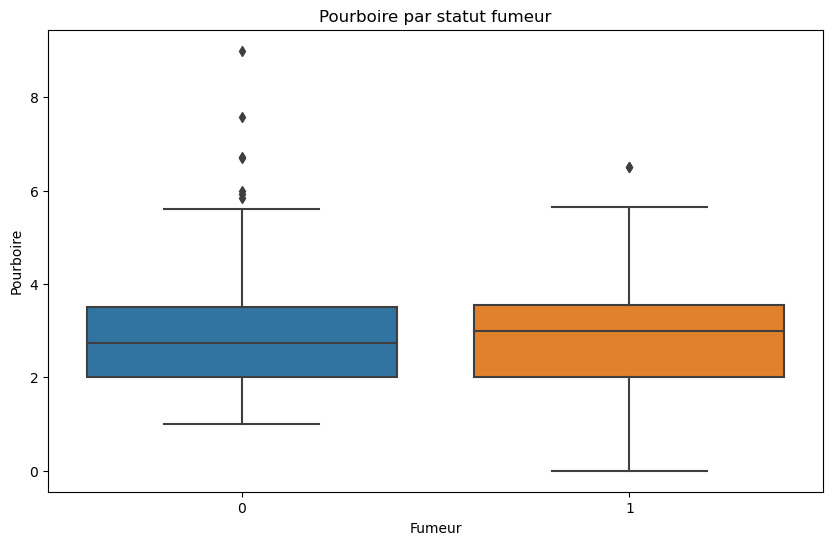

In [13]:
# Pourboire vs. Fumeur
plt.figure(figsize=(10,6))
sns.boxplot(
    x="SMOKER",
    y=data["TIP"].str.replace(",", ".").astype(float),
    data=data)
plt.title("Pourboire par statut fumeur")
plt.xlabel("Fumeur")
plt.ylabel("Pourboire")
plt.show()

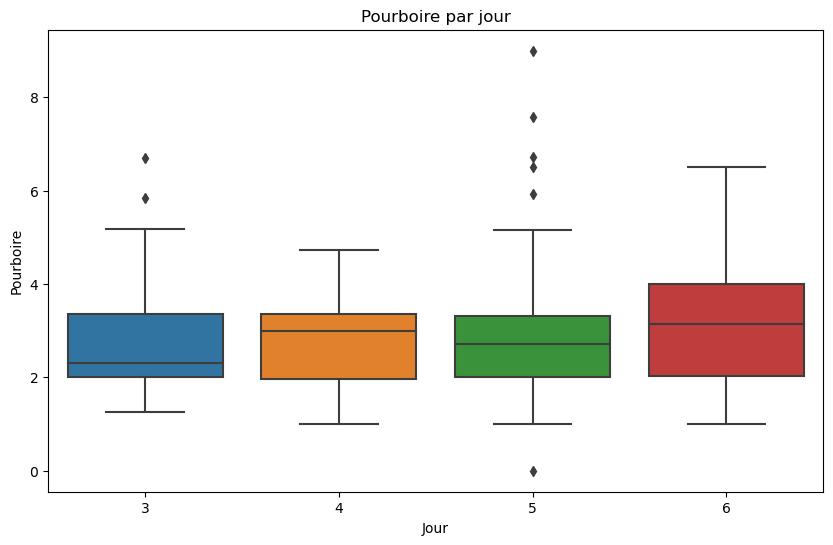

In [14]:
# Pourboire vs. Jour
plt.figure(figsize=(10,6))
sns.boxplot(
    x="DAY",
    y=data["TIP"].str.replace(",", ".").astype(float),
    data=data)
plt.title("Pourboire par jour")
plt.xlabel("Jour")
plt.ylabel("Pourboire")
plt.show()

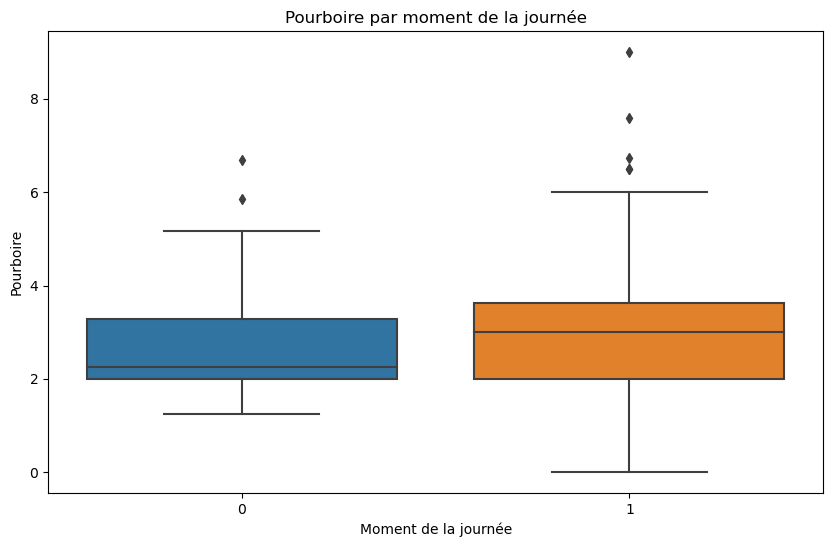

In [15]:
# Pourboire vs. Heure
plt.figure(figsize=(10,6))
sns.boxplot(
    x="TIME",
    y=data["TIP"].str.replace(",", ".").astype(float),
    data=data)
plt.title("Pourboire par moment de la journée")
plt.xlabel("Moment de la journée")
plt.ylabel("Pourboire")
plt.show()

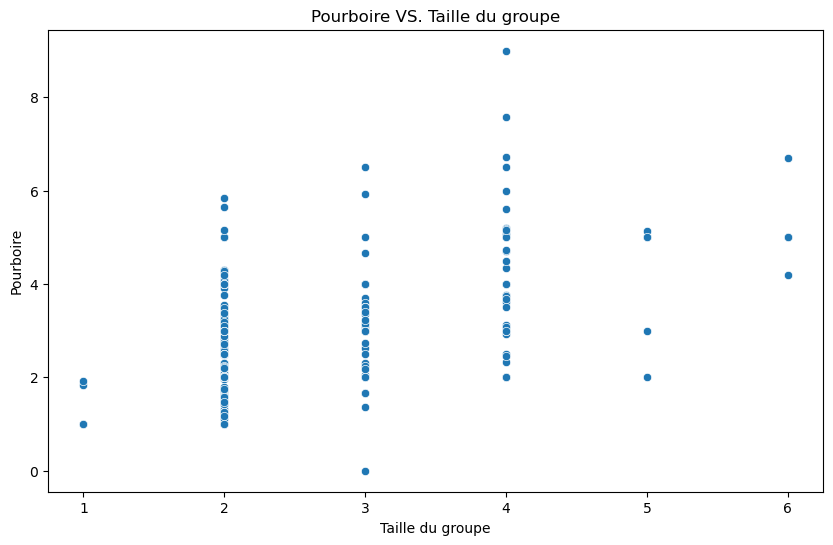

In [16]:
# Pourboire vs Taille du groupe
plt.figure(figsize=(10,6))
sns.scatterplot(
    x="SIZE",
    y=data["TIP"].str.replace(",", ".").astype(float),
    data=data)
plt.title("Pourboire VS. Taille du groupe")
plt.xlabel("Taille du groupe")
plt.ylabel("Pourboire")
plt.show()

## 2.4 Analyse multivariée

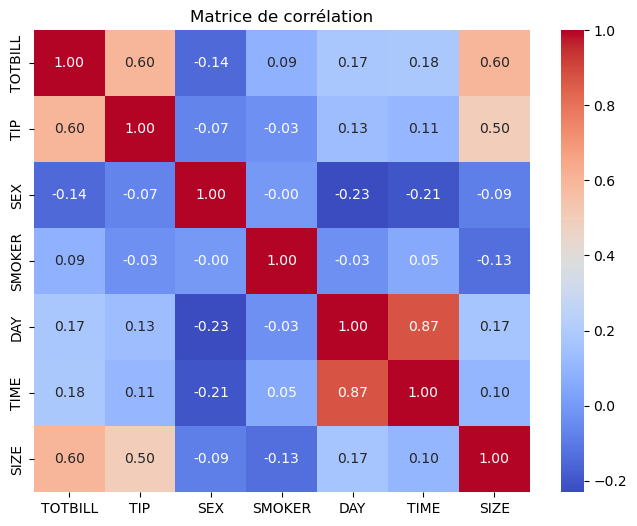

In [17]:
temp_data = data.copy()
temp_data["TOTBILL"] = temp_data["TOTBILL"].str.replace(',', '.').astype(float)
temp_data["TIP"] = temp_data["TIP"].str.replace(',', '.').astype(float)

corr_matrix = temp_data.corr(numeric_only=True)

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de corrélation")
plt.show()

# 3. Data Processing

## 3.1 Nettoyage des données

### 3.1.1 Vérification des valeurs manquantes

In [18]:
data.isna().sum()

IDEN       0
TOTBILL    0
TIP        0
SEX        0
SMOKER     0
DAY        0
TIME       0
SIZE       0
dtype: int64

Nous nous assurons que nous n'avons pas de donnée manquante. Dans notre cas nous n'avons pas de valeurs manquantes.

### 3.1.2 Vérification des doublons

In [19]:
data.duplicated().sum()

0

Nous nous assurons que nous n'avons pas de doublons. Dans notre cas nous n'avons pas de doublons.

### 3.1.3 Suppression des colonnes non nécessaires

On décide de supprimer la colonne IDEN car elle représente un identifiant unique pour chaque transaction, ce qui ne nous fournit pas d'information utile pour notre analyse de tendances ou des patterns dans les données.

In [20]:
data = data.drop(columns="IDEN", axis=0)

## 3.2 Transformation des données

### 3.2.1 Conversion de types de données

La variable TOTBILL est de type "object" alors qu'elle indique la facture totale sensé être un float.
Cette même variable contient des ",", pour transformer la variable en float il faut remplacer les virgules par des points.

In [21]:
data["TOTBILL"] = data["TOTBILL"].str.replace("," , ".")

Une fois les virgules remplacées par des points, nous pouvons finalement convertir TOTBILL en type "float"

In [22]:
data["TOTBILL"] = pd.to_numeric(data["TOTBILL"], errors="coerce")

Tout comme la variable TOTBILL, la variable TIP est de type "object" alors qu'elle indique la facture totale sensé être un float.
Cette même variable contient des ",", pour transformer la variable en float il faut remplacer les virgules par des points.

In [23]:
data["TIP"] = data["TIP"].str.replace("," , ".")

Une fois les virgules remplacées par des points, nous pouvons finalement convertir TIP en type "float"

In [24]:
data["TIP"] = pd.to_numeric(data["TIP"], errors="coerce")

## 3.3 Création de nouvelles variables

### 3.3.1 Pourcentage de pourboire

Une nouvelle variable PERCENTAGE nous permettra de mesurer le pourboire donné en proportion du total de la facture, offrant une perspective plus nuancé sur la générosité des clients indépendamment du montant total dépensé, ce qui nous facilitera l'analyse des facteurs influençant les comportements de pourboire

In [25]:
data["PERCENTAGE"] = data["TIP"] / data["TOTBILL"] * 100

### 3.3.2 Arrondi de TOTBILL

Cette fonction arrondit le nombre "x" au multiple de deux le plus proche

In [26]:
def round_to_nearest_two(x):
    return np.round(x / 2) * 2

On arrondit chaque valeur de la colonne TOTBILL au multiple de deux le plus proche
On stocke les résultats dans une nouvelle colonne TOTBILL_ROUNDED

In [27]:
data["TOTBILL_ROUNDED"] = data["TOTBILL"].apply(round_to_nearest_two)

### 3.3.3 Arrondi de TIP

Cette fonction arrondit le nombre "x" au multiple de 0.5 le plus proche

In [28]:
def round_to_nearest_half(x):
    return np.round(x / 0.5) * 0.5

On arrondit chaque valeur de la colonne TIP au multiple de 0.50 le plus proche
On stocke les résultats dans une nouvelle colonne TIP_ROUNDED

In [29]:
data["TIP_ROUNDED"] = data["TIP"].apply(round_to_nearest_half)

### 3.3.4 Création de TIP_STRONG_Q3

Une variable TIP_STRONG_Q3 pourrait nous aider à identifier clairement les pourboires généreux, facilitant l'analyse des facteurs qui influencent les clients à laisser un pourboire supérieur au 75ième percentile

In [30]:
quantile_tip = data["TIP"].quantile(0.75)
print(quantile_tip)

3.5199999999999996


Selon nos données, un pourboire supérieur à 3.52$ est considéré comme un pourboire généreux.

In [31]:
data["TIP_STRONG_Q3"] = (data["TIP"] >= quantile_tip).astype(int)

### 3.3.4 Création de LOW_PERCENTAGE et HIGH_PERCENTAGE

Créer une nouvelle colonne PERCENTAGE_BOOL. Cette colonne est remplie de valeurs booléennes en fonction des valeur de PERCENTAGE
POURCENTAGE >= 15% -> True
POURCENTAGE < 15% -> False

In [32]:
data["PERCENTAGE_BOOL"] = (data["PERCENTAGE"] >= 15).astype(int)

Encodage de la colonne booléenne

Nouvelle colonne pour chaque valeur unique possible dans la colonne PERCENTAGE_BOOL.

Deux nouvelles colonnes sont créées: PERCENTAGE_BOOL_0 et PERCENTAGE_BOOL_1

In [33]:
data = pd.get_dummies(data, columns=["PERCENTAGE_BOOL"], drop_first=False)

Renommage des colonnes:

PERCENTAGE_BOOL_0 -> LOW_PERCENTAGE
PERCENTAGE_BOOL_1 -> HIGH_PERCENTAGE

In [34]:
data.rename(columns={"PERCENTAGE_BOOL_0": "LOW_PERCENTAGE", "PERCENTAGE_BOOL_1": "HIGH_PERCENTAGE"}, inplace=True)

In [35]:
data

,TOTBILL,TIP,SEX,SMOKER,DAY,TIME,SIZE,PERCENTAGE,TOTBILL_ROUNDED,TIP_ROUNDED,TIP_STRONG_Q3,LOW_PERCENTAGE,HIGH_PERCENTAGE
0,16.99,1.01,1,0,6,1,2,5.944673,16.0,1.0,0,1,0
1,10.34,1.66,0,0,6,1,3,16.054159,10.0,1.5,0,0,1
2,21.01,3.50,0,0,6,1,3,16.658734,22.0,3.5,0,0,1
3,23.68,3.31,0,0,6,1,2,13.978041,24.0,3.5,0,1,0
4,24.59,3.61,1,0,6,1,4,14.680765,24.0,3.5,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,0,0,5,1,3,20.392697,30.0,6.0,1,0,1
240,27.18,2.00,1,1,5,1,2,7.358352,28.0,2.0,0,1,0
241,22.67,2.00,0,1,5,1,2,8.822232,22.0,2.0,0,1,0
242,17.82,1.75,0,0,5,1,2,9.820426,18.0,2.0,0,1,0


## 3.4 Anonymisation des données

### 3.4.1 Objectif de l'anonymisation

POURCENTAGE:
L'utilisation de pourcentages pour représenter les pourboires et le recours à des valeurs de TOTBILL et TIP arrondies contribuent à l'anonymisation des données. En exprimant les pourboires sous forme de pourcentages par rapport au total de la facture, nous préservons l'anonymat des montants bruts des transactions, tout en conservant des informations utiles sur la générosité des clients.

ARRONDISSEMENT:
En arrondissant les valeurs de TOTBILL et TIP, nous masquons les détails précis des transactions, réduisant ainsi le risque de divulgation involontaire d'informations personnelles.

L'arrondissement des données dans les colonnes TOTBILL_ROUNDED et TIP_ROUNDED est effectué de manière â préserver la distribution globale des valeurs de TOTBILL et TIP. Cette approche garantit que les caractéristiques essentielles de la distribtuion, telles que la forme générale et la dispersion des données, sont conservées dans les nouvelles variables arrondie. Ainsi, bien que les valeurs précises soient modifiées, les tendances et les propriétés statistiques de la distribution restent intactes, assurant une représentation fidèle des comportements de pourboire tout en préservant l'anonymat des données

TOTBILL:

In [36]:
totbill_data = data["TOTBILL"]
totbill_rounded_data = data["TOTBILL_ROUNDED"]

In [37]:
# Statistiques descriptives
print("Statistiques descriptives pour TOTBILL:")
print(totbill_data.describe())
print("\nStatistiques descriptives pour TOTBILL_ROUNDED:")
print(totbill_rounded_data.describe())

Statistiques descriptives pour TOTBILL:
count    244.000000
mean      19.785943
std        8.902412
min        3.070000
25%       13.347500
50%       17.795000
75%       24.127500
max       50.810000
Name: TOTBILL, dtype: float64

Statistiques descriptives pour TOTBILL_ROUNDED:
count    244.000000
mean      19.737705
std        8.872024
min        4.000000
25%       14.000000
50%       18.000000
75%       24.000000
max       50.000000
Name: TOTBILL_ROUNDED, dtype: float64


Globalement, les statistiques descriptives montrent que les distributions de TOTBILL et TOTBILL_ROUNDED sont très similaires. L'arrondissement des valeurs dans TOTBILL_ROUNDED n'a pas beaucoup affecté la répartition des données par rapport à TOTBILL

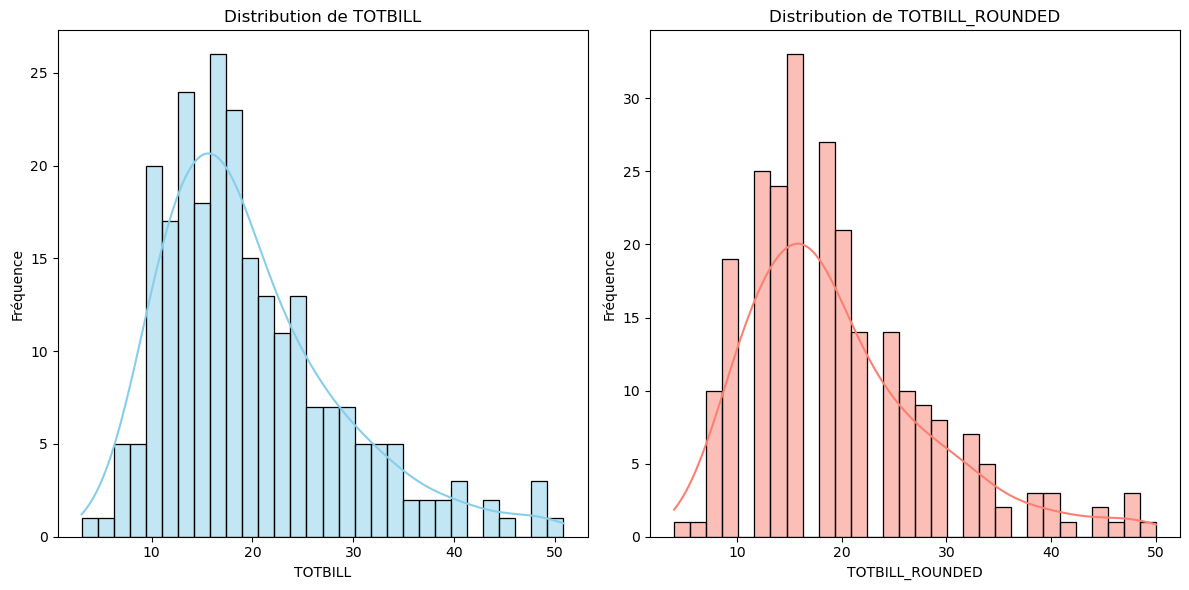

In [38]:
# Visualisation : Histogrammes
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(totbill_data, bins=30, kde=True, color="skyblue", edgecolor="black")
plt.title("Distribution de TOTBILL")
plt.xlabel("TOTBILL")
plt.ylabel("Fréquence")

plt.subplot(1, 2, 2)
sns.histplot(totbill_rounded_data, bins=30, kde=True, color="salmon", edgecolor="black")
plt.title("Distribution de TOTBILL_ROUNDED")
plt.xlabel("TOTBILL_ROUNDED")
plt.ylabel("Fréquence")

plt.tight_layout()
plt.show()

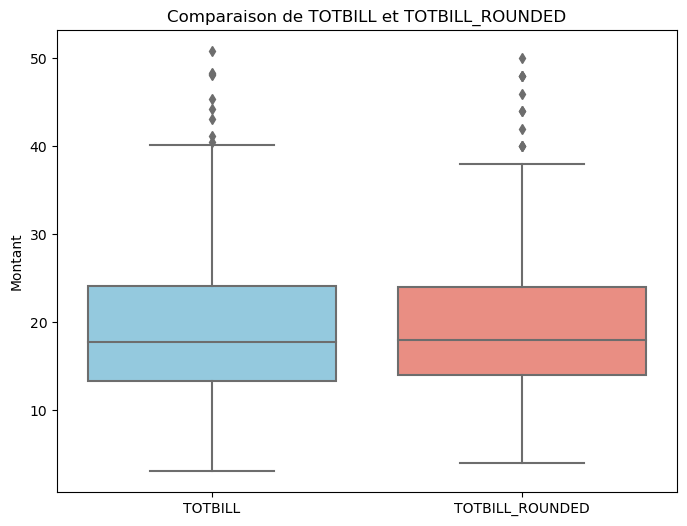

In [39]:
# Visualisation : Boxplots
plt.figure(figsize=(8, 6))
sns.boxplot(data=[totbill_data, totbill_rounded_data], palette=["skyblue", "salmon"])
plt.title("Comparaison de TOTBILL et TOTBILL_ROUNDED")
plt.xticks([0, 1], ["TOTBILL", "TOTBILL_ROUNDED"])
plt.ylabel("Montant")
plt.show()

In [40]:
# Test de Kolmogorov-Smirnov
ks_statistic, p_value = ks_2samp(totbill_data, totbill_rounded_data)
print(f"\nTest de Kolmogorov-Smirnov : Statistique KS = {ks_statistic}\np-value = {p_value}")


Test de Kolmogorov-Smirnov : Statistique KS = 0.06967213114754098
p-value = 0.595368916941069


KS mesure à quel point les distributions de TOTBILL et TOTBILL_ROUNDED sont différentes.

Une valeur de statistique KS plus élevé indique des distributions plus différentes

La p-value indique si cette différence est significative ou non

Une p-value faible ( < 0.05 généralement) signifie que la différence est significative, et on peut conclure que les distributions sont différentes

Une p-value élevée ( > 0.05) signifique qu'il n'y a pas suffisamment de preuves pour conclure que les distributions sont différentes.

Dans notre cas, p-value est de 0.595, ce qui est élevé.

Donc il n'y a pas suffisamment de preuves pour dire que les distributions de TOTBILL et TOTBILL_ROUNDED sont différentes.

Nos deux distributions sont similaires selon KS.

TIP:

In [41]:
tip_data = data["TIP"]
tip_rounded_data = data["TIP_ROUNDED"]

In [42]:
# Statistiques descriptives
print("Statistiques descriptives pour TIP:")
print(tip_data.describe())
print("\nStatistiques descriptives pour TIP_ROUNDED:")
print(tip_rounded_data.describe())

Statistiques descriptives pour TIP:
count    244.000000
mean       2.957295
std        1.322126
min        0.000000
25%        2.000000
50%        2.855000
75%        3.520000
max        9.000000
Name: TIP, dtype: float64

Statistiques descriptives pour TIP_ROUNDED:
count    244.000000
mean       2.934426
std        1.320853
min        0.000000
25%        2.000000
50%        3.000000
75%        3.500000
max        9.000000
Name: TIP_ROUNDED, dtype: float64


Globalement, les statistiques descriptives sont très similaires. TIP_ROUNDED n'a pas beaucoup affecté la répartition des données par rapport à TIP. Cela confirme encore une fois l'efficacité de l'anonymisation des données tout en préservant leur utilisé pour l'analyse

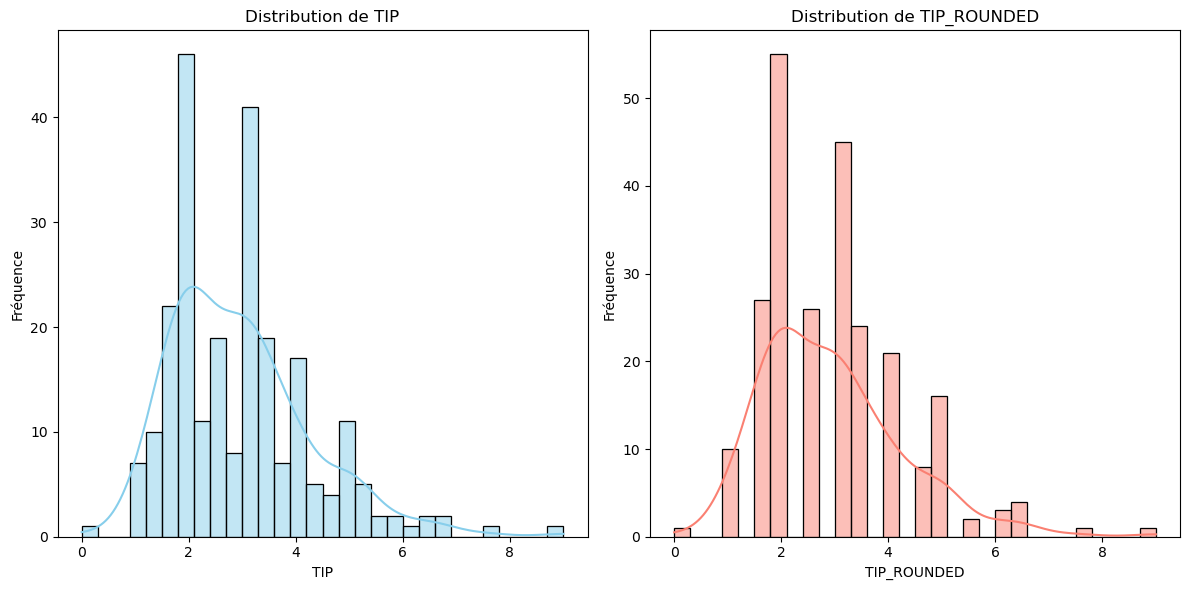

In [43]:
# Visualisation : Histogrammes
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(tip_data, bins=30, kde=True, color="skyblue", edgecolor="black")
plt.title("Distribution de TIP")
plt.xlabel("TIP")
plt.ylabel("Fréquence")

plt.subplot(1, 2, 2)
sns.histplot(tip_rounded_data, bins=30, kde=True, color="salmon", edgecolor="black")
plt.title("Distribution de TIP_ROUNDED")
plt.xlabel("TIP_ROUNDED")
plt.ylabel("Fréquence")

plt.tight_layout()
plt.show()

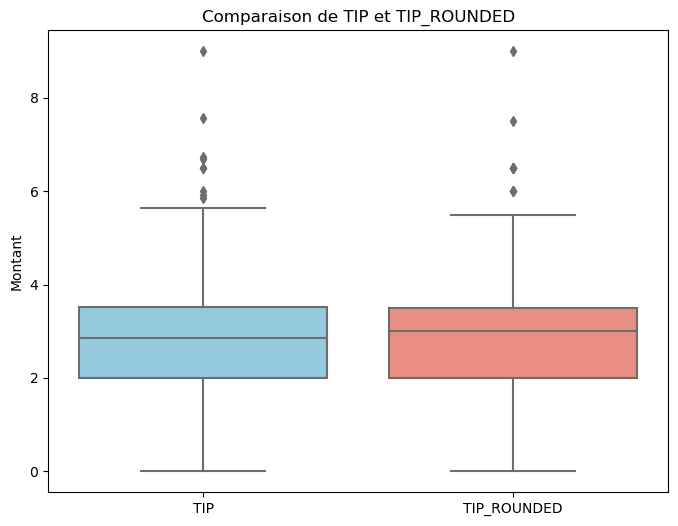

In [44]:
# Visualisation : Boxplots
plt.figure(figsize=(8, 6))
sns.boxplot(data=[tip_data, tip_rounded_data], palette=["skyblue", "salmon"])
plt.title("Comparaison de TIP et TIP_ROUNDED")
plt.xticks([0, 1], ["TIP", "TIP_ROUNDED"])
plt.ylabel("Montant")
plt.show()

In [45]:
# Test de Kolmogorov-Smirnov
ks_statistic, p_value = ks_2samp(tip_data, tip_rounded_data)
print(f"\nTest de Kolmogorov-Smirnov : Statistique KS = {ks_statistic}\np-value = {p_value}")


Test de Kolmogorov-Smirnov : Statistique KS = 0.06967213114754098
p-value = 0.595368916941069


Une p-value élevé ( > 0.05 ) signifie qu'il n'y a pas suffisamment de preuves pour rejeter l'hypothèse nulle. Cela suggère que les distributions de TIP et TIP_ROUNDED sont similaires selon ce test.

Nous obtenons à peu près les mêmes distributions pour TOTBILL & TOTBILL_ROUNDED et TIP & TIP_ROUNDED en choississant d'arrondir respectivement au multiple de 2 et de 0.5. 

Ce choix de multiple a été fait intuitivement.

## 3.5 Outliers

### 3.5.1 Identification des outliers

IQR:

In [46]:
q1_tip = data["TIP"].quantile(0.25)
q3_tip = data["TIP"].quantile(0.75)

iqr_tip = q3_tip - q1_tip

lower_whisker_tip = q1_tip - 1.2 * iqr_tip
upper_whisker_tip = q3_tip + 1.2 * iqr_tip

outliers_iqr = data[(data["TIP"] < lower_whisker_tip) | (data["TIP"] > upper_whisker_tip)]

print("Nombre d'outliers pour TIP selon IQR:", len(outliers_iqr))

Nombre d'outliers pour TIP selon IQR: 12


In [47]:
print("Lignes des outliers pour TIP selon IQR:\n", outliers_iqr)

Lignes des outliers pour TIP selon IQR:
      TOTBILL   TIP  SEX  SMOKER  DAY  TIME  SIZE  PERCENTAGE  TOTBILL_ROUNDED  \
23     39.42  7.58    0       0    5     1     4   19.228818             40.0   
44     30.40  5.60    0       0    6     1     4   18.421053             30.0   
47     32.40  6.00    0       0    6     1     4   18.518519             32.0   
59     48.27  6.73    0       0    5     1     4   13.942407             48.0   
88     24.71  5.85    0       0    3     0     2   23.674626             24.0   
141    34.30  6.70    0       0    3     0     6   19.533528             34.0   
170    50.81  0.00    0       1    5     1     3    0.000000             50.0   
181    23.33  5.65    0       1    6     1     2   24.217745             24.0   
183    23.17  6.50    0       1    6     1     4   28.053517             24.0   
212    48.33  9.00    0       0    5     1     4   18.621974             48.0   
214    28.17  6.50    1       1    5     1     3   23.074192        

In [48]:
outliers_iqr[["TIP","TIP_STRONG_Q3","PERCENTAGE","LOW_PERCENTAGE","HIGH_PERCENTAGE"]]

,TIP,TIP_STRONG_Q3,PERCENTAGE,LOW_PERCENTAGE,HIGH_PERCENTAGE
23,7.58,1,19.228818,0,1
44,5.60,1,18.421053,0,1
47,6.00,1,18.518519,0,1
59,6.73,1,13.942407,1,0
88,5.85,1,23.674626,0,1
141,6.70,1,19.533528,0,1
170,0.00,0,0.000000,1,0
181,5.65,1,24.217745,0,1
183,6.50,1,28.053517,0,1
212,9.00,1,18.621974,0,1


Il est logique de constater que la plupart de nos outliers ont également une valeur de 1 dans la colonne TIP_STRONG_Q3. Cela signifie que la majorité des valeurs aberrantes correspondent à des montants de pourboire particulièrement élevés par rapport à la distribution générale des pourboires.

Même si la majorité des valeurs de la variable TIP_STRONG_Q3 sont égales à 1 pour les outliers détectés, il peut y avoir des cas particuliers comme la ligne 170 où nous avons 0$ de tips. Penchons nous sur cette cas

In [49]:
print("Nombre de lignes avec un montant de pourboire de 0$:", len(data[data["TIP"] == 0]))

Nombre de lignes avec un montant de pourboire de 0$: 1


En effet, nous voyons que nous avons qu'une seule ligne dans notre dataset ayant la valeur 0 dans la colonne TIP. Ce qui peut nous aider à comprendre pourquoi cette ligne est considéré comme un outlier.

Z-SCORE

In [50]:
threshold = 2
outliers_zscore = data[abs(zscore(data["TIP"])) > threshold]
print("Nombre d'outliers pour TIP selon Z-SCORE:", len(outliers_zscore))

Nombre d'outliers pour TIP selon Z-SCORE: 12


In [51]:
print("Lignes des outliers pour TIP selon IQR:\n", outliers_zscore)

Lignes des outliers pour TIP selon IQR:
      TOTBILL   TIP  SEX  SMOKER  DAY  TIME  SIZE  PERCENTAGE  TOTBILL_ROUNDED  \
23     39.42  7.58    0       0    5     1     4   19.228818             40.0   
44     30.40  5.60    0       0    6     1     4   18.421053             30.0   
47     32.40  6.00    0       0    6     1     4   18.518519             32.0   
59     48.27  6.73    0       0    5     1     4   13.942407             48.0   
88     24.71  5.85    0       0    3     0     2   23.674626             24.0   
141    34.30  6.70    0       0    3     0     6   19.533528             34.0   
170    50.81  0.00    0       1    5     1     3    0.000000             50.0   
181    23.33  5.65    0       1    6     1     2   24.217745             24.0   
183    23.17  6.50    0       1    6     1     4   28.053517             24.0   
212    48.33  9.00    0       0    5     1     4   18.621974             48.0   
214    28.17  6.50    1       1    5     1     3   23.074192        

In [52]:
outliers_zscore[["TIP","TIP_STRONG_Q3","PERCENTAGE","LOW_PERCENTAGE","HIGH_PERCENTAGE"]]

,TIP,TIP_STRONG_Q3,PERCENTAGE,LOW_PERCENTAGE,HIGH_PERCENTAGE
23,7.58,1,19.228818,0,1
44,5.60,1,18.421053,0,1
47,6.00,1,18.518519,0,1
59,6.73,1,13.942407,1,0
88,5.85,1,23.674626,0,1
141,6.70,1,19.533528,0,1
170,0.00,0,0.000000,1,0
181,5.65,1,24.217745,0,1
183,6.50,1,28.053517,0,1
212,9.00,1,18.621974,0,1


La présence d'outliers peut influcencer nos résultats d'analyses en biaisant les estimations ou les prédictions. Cependant, dans notre cas, ils révèlent des insights précieux sur le comportement des clients.

Il est intéressant d'explorer ces outliers plus en détail pour comprendre ce qui les distingue des autres observations.

### 3.5.2 Explication de la non-standardisation et de l'importance des outliers

## 3.6 Suppression des colonnes originales

Afin de simplifier notre jeu de données tout en préservant l'intégrité de notre processus d'anonymisation, nous allons alors supprimer les colonnes originales TOTBILL et TIP pour minimser les risques potentiels liés à la divulgation d'informations sensibles

In [53]:
data.drop(columns=["TOTBILL", "TIP"], inplace=True)

In [54]:
data

,SEX,SMOKER,DAY,TIME,SIZE,PERCENTAGE,TOTBILL_ROUNDED,TIP_ROUNDED,TIP_STRONG_Q3,LOW_PERCENTAGE,HIGH_PERCENTAGE
0,1,0,6,1,2,5.944673,16.0,1.0,0,1,0
1,0,0,6,1,3,16.054159,10.0,1.5,0,0,1
2,0,0,6,1,3,16.658734,22.0,3.5,0,0,1
3,0,0,6,1,2,13.978041,24.0,3.5,0,1,0
4,1,0,6,1,4,14.680765,24.0,3.5,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
239,0,0,5,1,3,20.392697,30.0,6.0,1,0,1
240,1,1,5,1,2,7.358352,28.0,2.0,0,1,0
241,0,1,5,1,2,8.822232,22.0,2.0,0,1,0
242,0,0,5,1,2,9.820426,18.0,2.0,0,1,0


# 4. Post-Exploratory Data Analysis

## 4.1 Compréhension des données

In [55]:
data.head()

,SEX,SMOKER,DAY,TIME,SIZE,PERCENTAGE,TOTBILL_ROUNDED,TIP_ROUNDED,TIP_STRONG_Q3,LOW_PERCENTAGE,HIGH_PERCENTAGE
0,1,0,6,1,2,5.944673,16.0,1.0,0,1,0
1,0,0,6,1,3,16.054159,10.0,1.5,0,0,1
2,0,0,6,1,3,16.658734,22.0,3.5,0,0,1
3,0,0,6,1,2,13.978041,24.0,3.5,0,1,0
4,1,0,6,1,4,14.680765,24.0,3.5,1,1,0


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SEX              244 non-null    int64  
 1   SMOKER           244 non-null    int64  
 2   DAY              244 non-null    int64  
 3   TIME             244 non-null    int64  
 4   SIZE             244 non-null    int64  
 5   PERCENTAGE       244 non-null    float64
 6   TOTBILL_ROUNDED  244 non-null    float64
 7   TIP_ROUNDED      244 non-null    float64
 8   TIP_STRONG_Q3    244 non-null    int32  
 9   LOW_PERCENTAGE   244 non-null    uint8  
 10  HIGH_PERCENTAGE  244 non-null    uint8  
dtypes: float64(3), int32(1), int64(5), uint8(2)
memory usage: 16.8 KB


In [57]:
data.describe()

,SEX,SMOKER,DAY,TIME,SIZE,PERCENTAGE,TOTBILL_ROUNDED,TIP_ROUNDED,TIP_STRONG_Q3,LOW_PERCENTAGE,HIGH_PERCENTAGE
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,0.356557,0.381148,4.725410,0.721311,2.569672,15.999598,19.737705,2.934426,0.250000,0.446721,0.553279
std,0.479967,0.486667,1.155774,0.449276,0.951100,6.188889,8.872024,1.320853,0.433903,0.498175,0.498175
min,0.000000,0.000000,3.000000,0.000000,1.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,3.000000,0.000000,2.000000,12.794122,14.000000,2.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,5.000000,1.000000,2.000000,15.408357,18.000000,3.000000,0.000000,0.000000,1.000000
75%,1.000000,1.000000,6.000000,1.000000,3.000000,19.065829,24.000000,3.500000,0.250000,1.000000,1.000000
max,1.000000,1.000000,6.000000,1.000000,6.000000,71.034483,50.000000,9.000000,1.000000,1.000000,1.000000


In [58]:
print("Nombre de valeurs manquantes par variable:")
print(data.isna().sum())

Nombre de valeurs manquantes par variable:
SEX                0
SMOKER             0
DAY                0
TIME               0
SIZE               0
PERCENTAGE         0
TOTBILL_ROUNDED    0
TIP_ROUNDED        0
TIP_STRONG_Q3      0
LOW_PERCENTAGE     0
HIGH_PERCENTAGE    0
dtype: int64


## 4.2 Analyse univariée

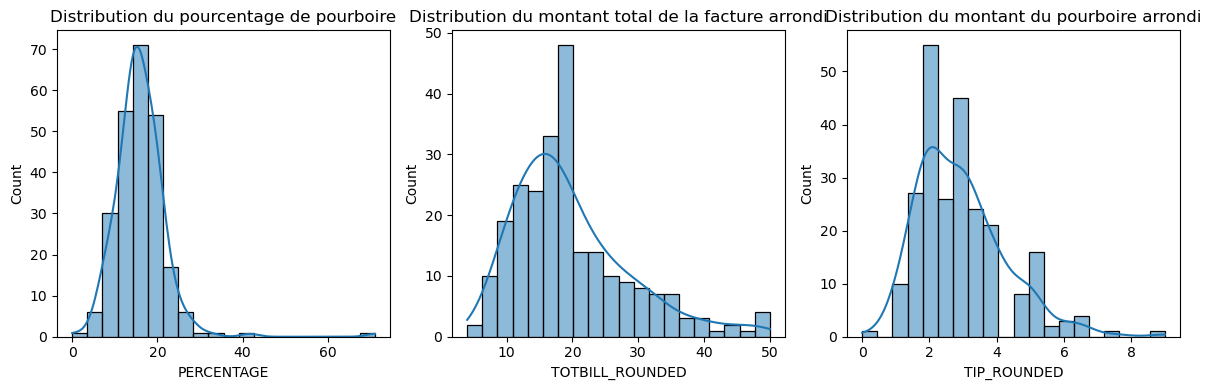

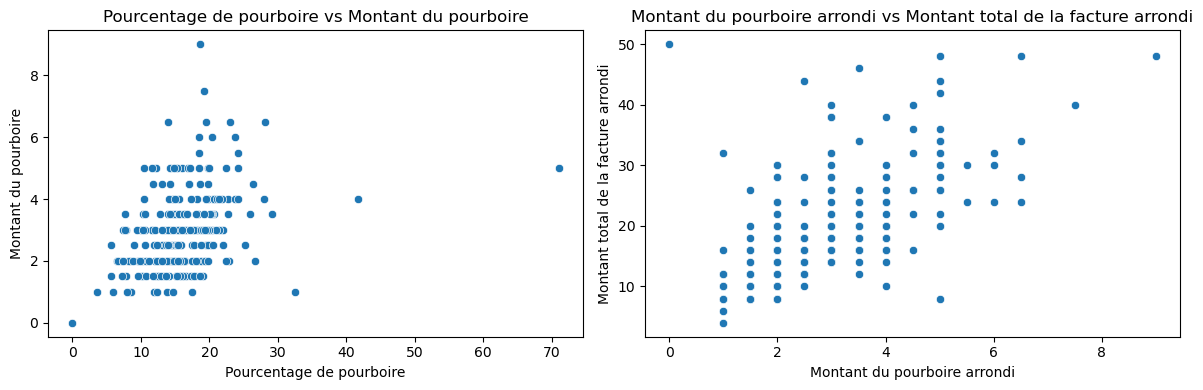

In [59]:
# Analyse univariée des variables continues
plt.figure(figsize=(12, 4))

# Distribution du pourcentage de pourboire (PERCENTAGE)
plt.subplot(1, 3, 1)
sns.histplot(data=data, x='PERCENTAGE', kde=True, bins=20)
plt.title('Distribution du pourcentage de pourboire')

# Distribution du montant total de la facture arrondi (TOTBILL_ROUNDED)
plt.subplot(1, 3, 2)
sns.histplot(data=data, x='TOTBILL_ROUNDED', kde=True, bins=20)
plt.title('Distribution du montant total de la facture arrondi')

# Distribution du montant du pourboire arrondi (TIP_ROUNDED)
plt.subplot(1, 3, 3)
sns.histplot(data=data, x='TIP_ROUNDED', kde=True, bins=20)
plt.title('Distribution du montant du pourboire arrondi')

plt.tight_layout()
plt.show()

# Relation entre les variables continues et le pourboire (TIP)
plt.figure(figsize=(12, 4))

# Relation entre le pourcentage de pourboire et le montant total de la facture arrondi
plt.subplot(1, 2, 1)
sns.scatterplot(x='PERCENTAGE', y='TIP_ROUNDED', data=data)
plt.title('Pourcentage de pourboire vs Montant du pourboire')
plt.xlabel('Pourcentage de pourboire')
plt.ylabel('Montant du pourboire')

# Relation entre le montant du pourboire arrondi et le montant total de la facture arrondi
plt.subplot(1, 2, 2)
sns.scatterplot(x='TIP_ROUNDED', y='TOTBILL_ROUNDED', data=data)
plt.title('Montant du pourboire arrondi vs Montant total de la facture arrondi')
plt.xlabel('Montant du pourboire arrondi')
plt.ylabel('Montant total de la facture arrondi')

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Nombre de clients')

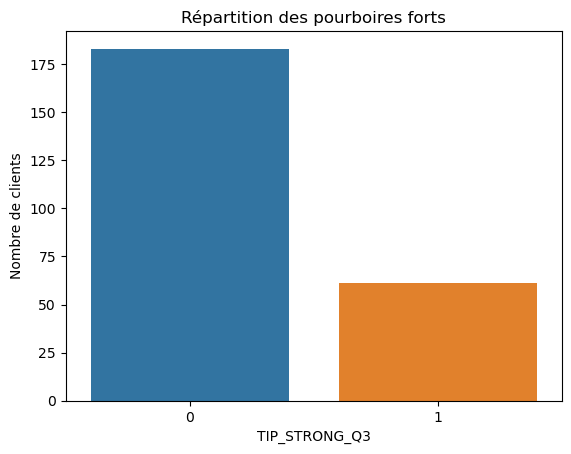

In [60]:
# TIP_STRONG_Q3
sns.countplot(x='TIP_STRONG_Q3', data=data)
plt.title('Répartition des pourboires forts')
plt.xlabel('TIP_STRONG_Q3')
plt.ylabel('Nombre de clients')

## 4.3 Analyse bivariée

### 4.3.1 ANALYSE BIVARIÉE POUR TIP_ROUNDED

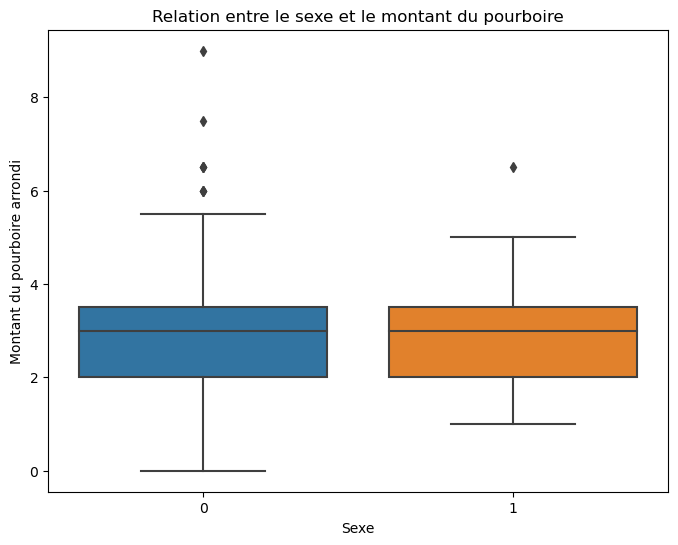

In [61]:
# Relation entre le sexe et le montant du pourboire
plt.figure(figsize=(8, 6))
sns.boxplot(x='SEX', y='TIP_ROUNDED', data=data)
plt.title('Relation entre le sexe et le montant du pourboire')
plt.xlabel('Sexe')
plt.ylabel('Montant du pourboire arrondi')
plt.show()

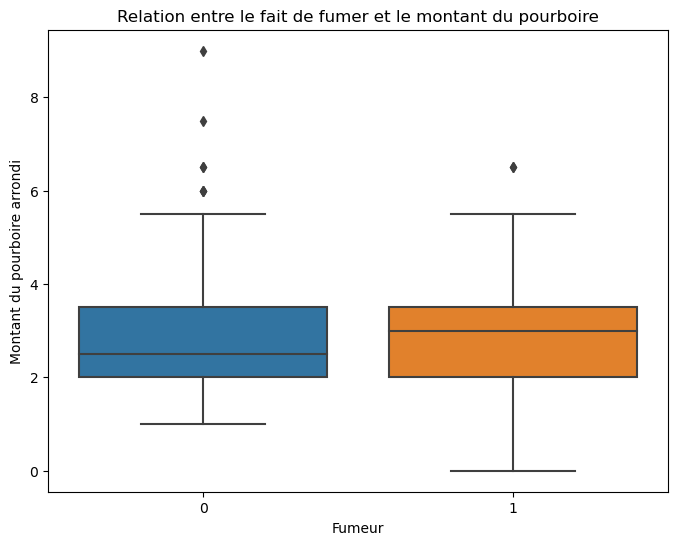

In [62]:
# Relation entre le fait de fumer et le montant du pourboire
plt.figure(figsize=(8, 6))
sns.boxplot(x='SMOKER', y='TIP_ROUNDED', data=data)
plt.title('Relation entre le fait de fumer et le montant du pourboire')
plt.xlabel('Fumeur')
plt.ylabel('Montant du pourboire arrondi')
plt.show()

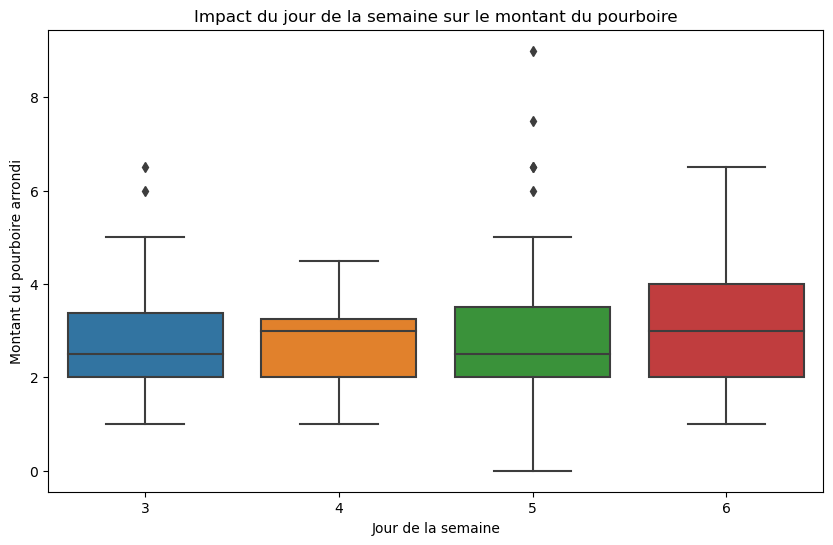

In [63]:
# Impact du jour de la semaine sur le montant du pourboire
plt.figure(figsize=(10, 6))
sns.boxplot(x='DAY', y='TIP_ROUNDED', data=data)
plt.title('Impact du jour de la semaine sur le montant du pourboire')
plt.xlabel('Jour de la semaine')
plt.ylabel('Montant du pourboire arrondi')
plt.show()

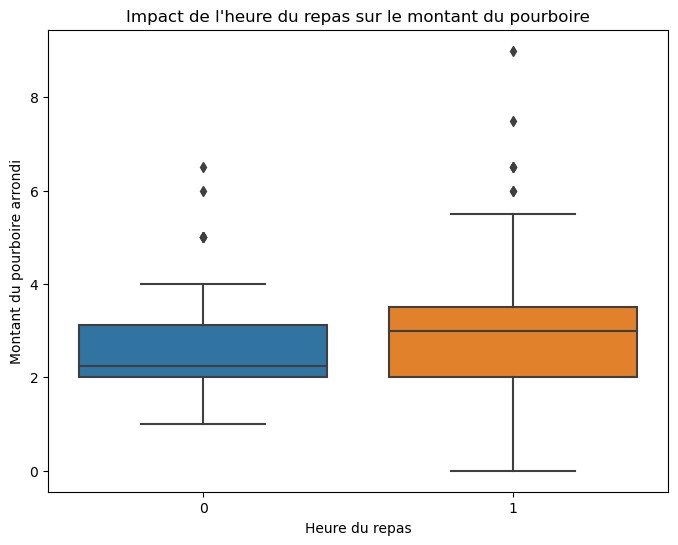

In [64]:
# Impact de l'heure du repas sur le montant du pourboire
plt.figure(figsize=(8, 6))
sns.boxplot(x='TIME', y='TIP_ROUNDED', data=data)
plt.title('Impact de l\'heure du repas sur le montant du pourboire')
plt.xlabel('Heure du repas')
plt.ylabel('Montant du pourboire arrondi')
plt.show()

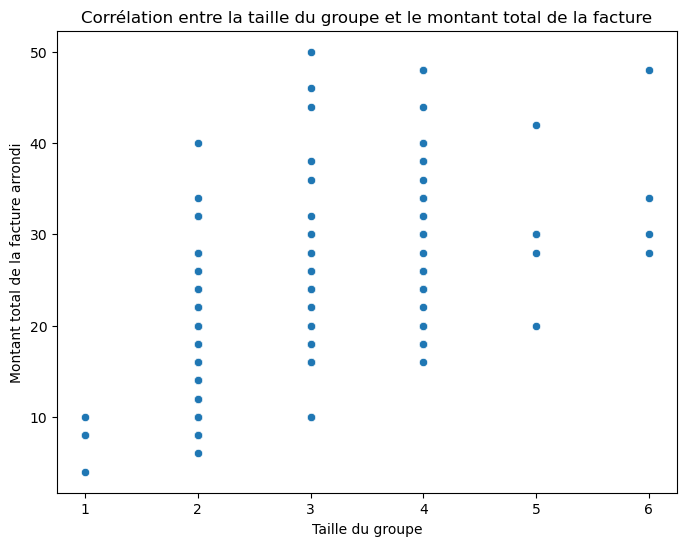

In [65]:
# Corrélation entre la taille du groupe et le montant total de la facture
plt.figure(figsize=(8, 6))
sns.scatterplot(x='SIZE', y='TOTBILL_ROUNDED', data=data)
plt.title('Corrélation entre la taille du groupe et le montant total de la facture')
plt.xlabel('Taille du groupe')
plt.ylabel('Montant total de la facture arrondi')
plt.show()

### 4.3.2 ANALYSE BIVARIÉE POUR TIP_STRONG

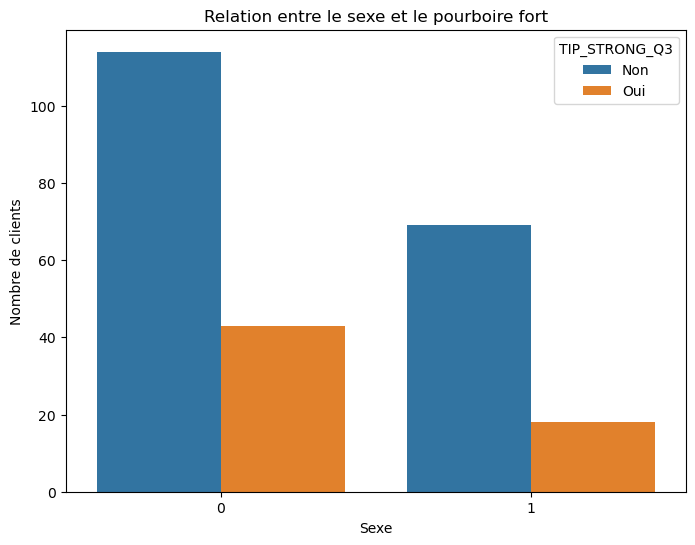

In [66]:
# Relation entre le sexe et le pourboire fort
plt.figure(figsize=(8, 6))
sns.countplot(x='SEX', hue='TIP_STRONG_Q3', data=data)
plt.title('Relation entre le sexe et le pourboire fort')
plt.xlabel('Sexe')
plt.ylabel('Nombre de clients')
plt.legend(title='TIP_STRONG_Q3', loc='upper right', labels=['Non', 'Oui'])
plt.show()

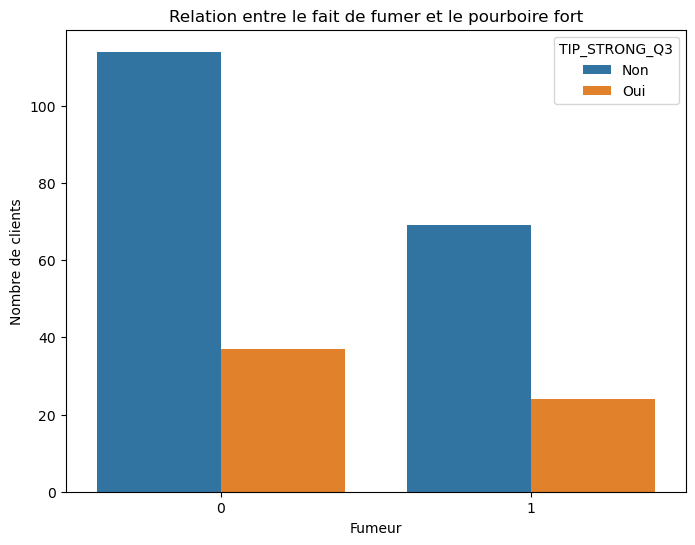

In [67]:
# Relation entre le fait de fumer et le pourboire fort
plt.figure(figsize=(8, 6))
sns.countplot(x='SMOKER', hue='TIP_STRONG_Q3', data=data)
plt.title('Relation entre le fait de fumer et le pourboire fort')
plt.xlabel('Fumeur')
plt.ylabel('Nombre de clients')
plt.legend(title='TIP_STRONG_Q3', loc='upper right', labels=['Non', 'Oui'])
plt.show()

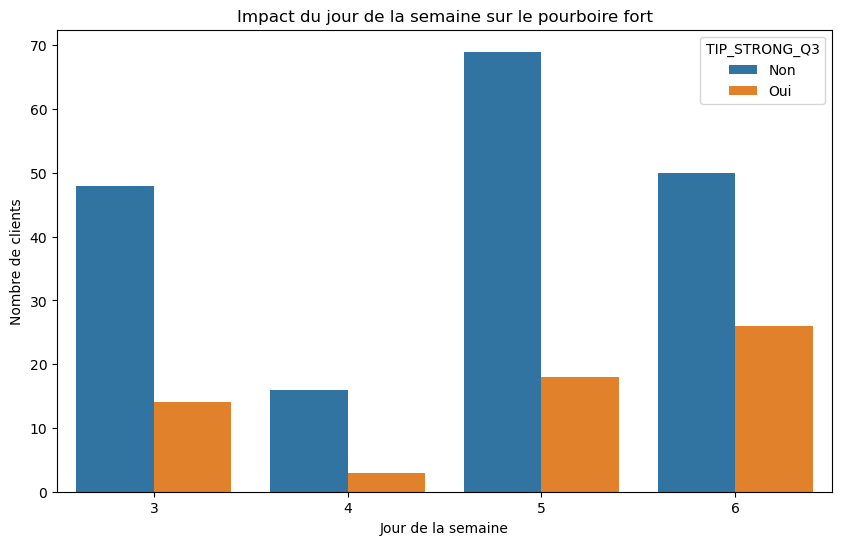

In [68]:
# Impact du jour de la semaine sur le pourboire fort
plt.figure(figsize=(10, 6))
sns.countplot(x='DAY', hue='TIP_STRONG_Q3', data=data)
plt.title('Impact du jour de la semaine sur le pourboire fort')
plt.xlabel('Jour de la semaine')
plt.ylabel('Nombre de clients')
plt.legend(title='TIP_STRONG_Q3', loc='upper right', labels=['Non', 'Oui'])
plt.show()

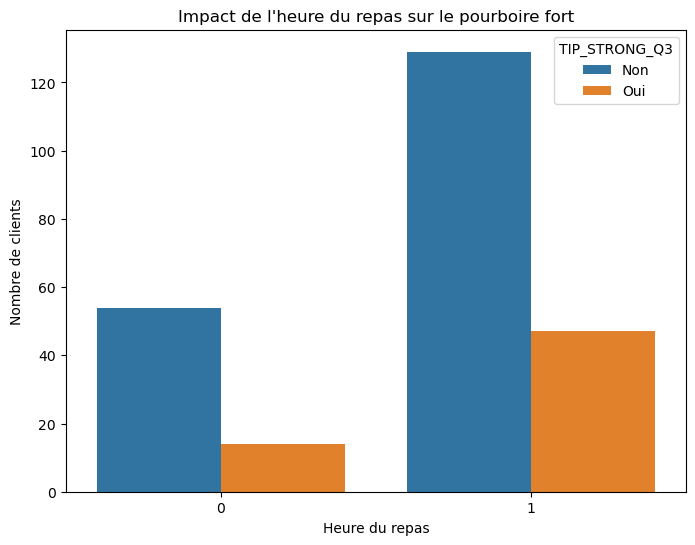

In [69]:
# Impact de l'heure du repas sur le pourboire fort
plt.figure(figsize=(8, 6))
sns.countplot(x='TIME', hue='TIP_STRONG_Q3', data=data)
plt.title('Impact de l\'heure du repas sur le pourboire fort')
plt.xlabel('Heure du repas')
plt.ylabel('Nombre de clients')
plt.legend(title='TIP_STRONG_Q3', loc='upper right', labels=['Non', 'Oui'])
plt.show()

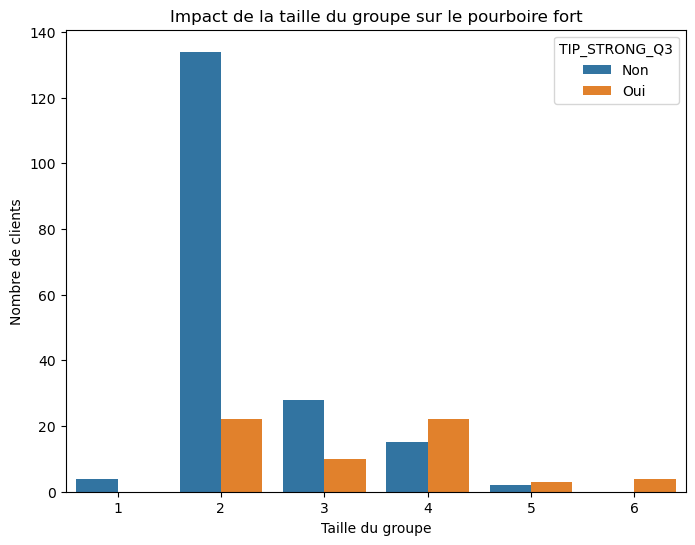

In [70]:
# Impact de la taille du groupe sur le pourboire fort
plt.figure(figsize=(8, 6))
sns.countplot(x='SIZE', hue='TIP_STRONG_Q3', data=data)
plt.title('Impact de la taille du groupe sur le pourboire fort')
plt.xlabel('Taille du groupe')
plt.ylabel('Nombre de clients')
plt.legend(title='TIP_STRONG_Q3', loc='upper right', labels=['Non', 'Oui'])
plt.show()

### 4.3.3 ANALYSE BIVARIÉE POUR PERCENTAGE

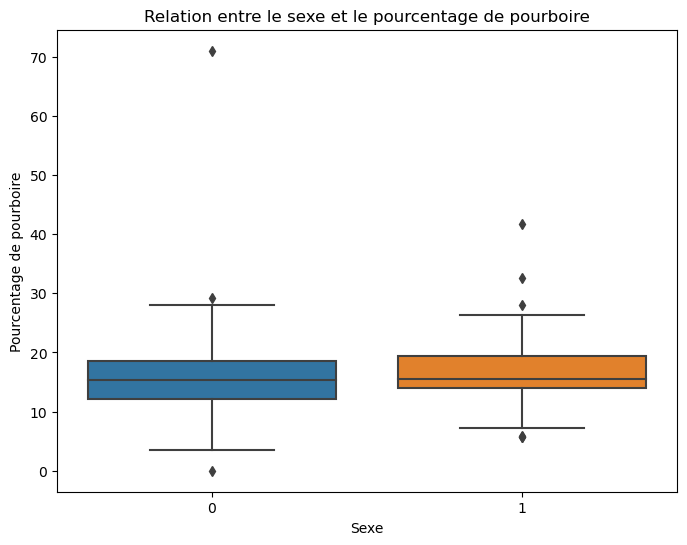

In [71]:
# Relation entre le sexe et le pourcentage de pourboire
plt.figure(figsize=(8, 6))
sns.boxplot(x='SEX', y='PERCENTAGE', data=data)
plt.title('Relation entre le sexe et le pourcentage de pourboire')
plt.xlabel('Sexe')
plt.ylabel('Pourcentage de pourboire')
plt.show()

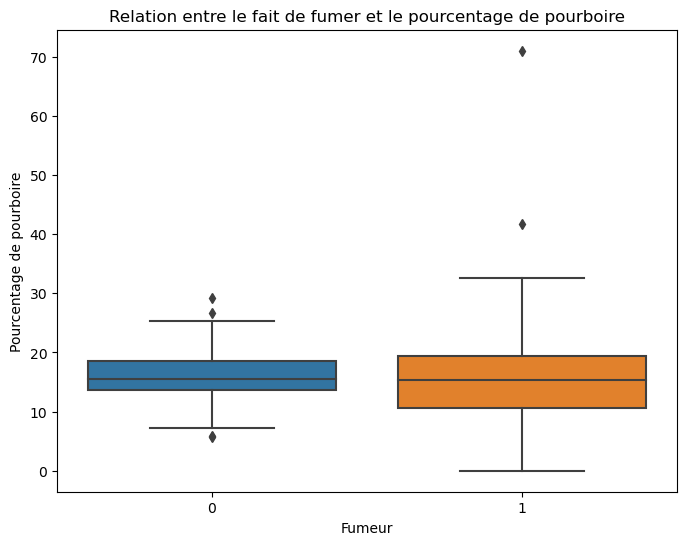

In [72]:
# Relation entre le fait de fumer et le pourcentage de pourboire
plt.figure(figsize=(8, 6))
sns.boxplot(x='SMOKER', y='PERCENTAGE', data=data)
plt.title('Relation entre le fait de fumer et le pourcentage de pourboire')
plt.xlabel('Fumeur')
plt.ylabel('Pourcentage de pourboire')
plt.show()

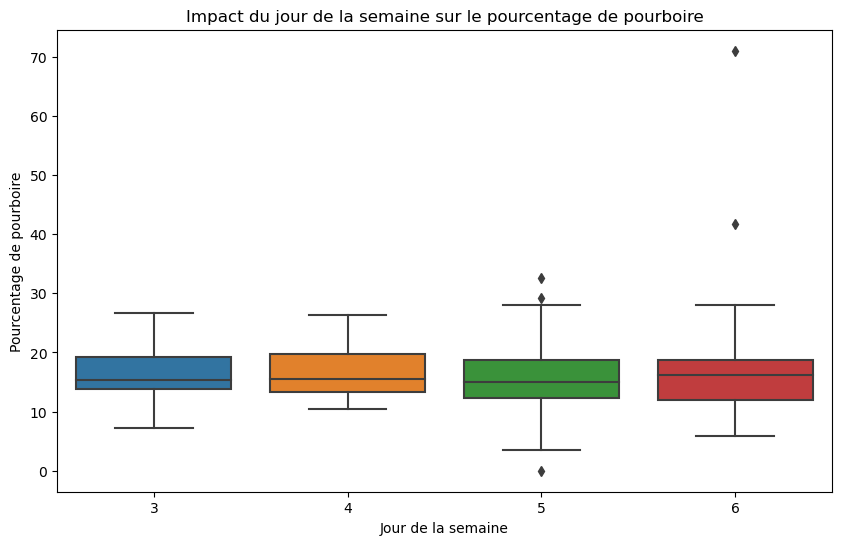

In [73]:
# Impact du jour de la semaine sur le pourcentage de pourboire
plt.figure(figsize=(10, 6))
sns.boxplot(x='DAY', y='PERCENTAGE', data=data)
plt.title('Impact du jour de la semaine sur le pourcentage de pourboire')
plt.xlabel('Jour de la semaine')
plt.ylabel('Pourcentage de pourboire')
plt.show()

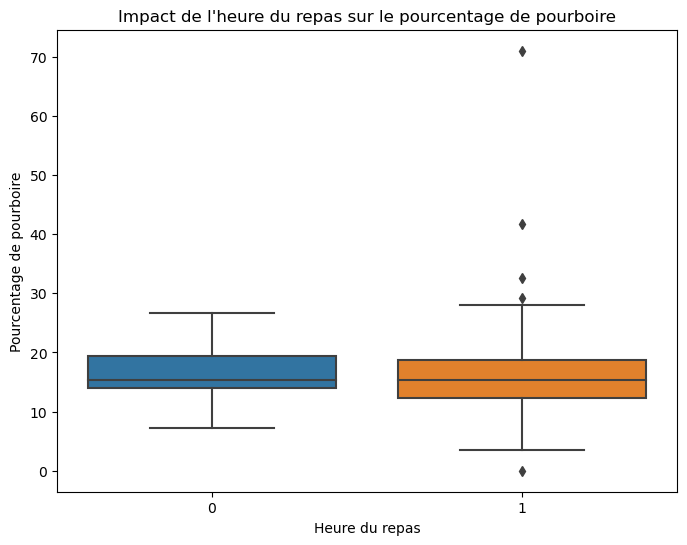

In [74]:
# Impact de l'heure du repas sur le pourcentage de pourboire
plt.figure(figsize=(8, 6))
sns.boxplot(x='TIME', y='PERCENTAGE', data=data)
plt.title('Impact de l\'heure du repas sur le pourcentage de pourboire')
plt.xlabel('Heure du repas')
plt.ylabel('Pourcentage de pourboire')
plt.show()

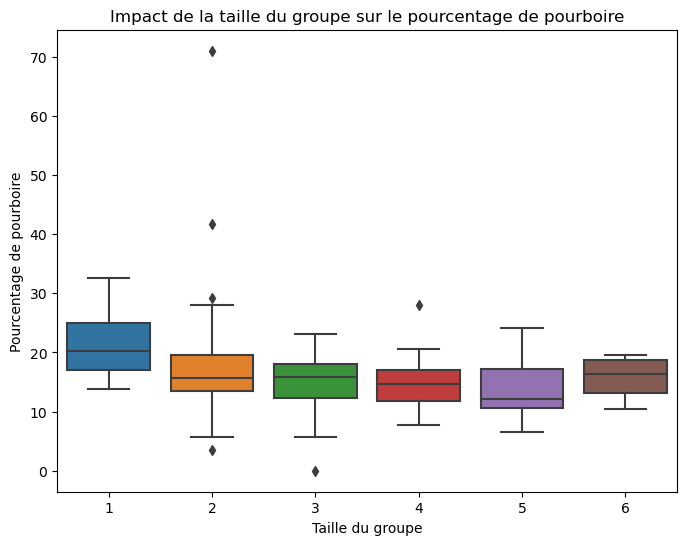

In [75]:
# Impact de la taille du groupe sur le pourcentage de pourboire
plt.figure(figsize=(8, 6))
sns.boxplot(x='SIZE', y='PERCENTAGE', data=data)
plt.title('Impact de la taille du groupe sur le pourcentage de pourboire')
plt.xlabel('Taille du groupe')
plt.ylabel('Pourcentage de pourboire')
plt.show()

## 4.4 Analyse multivariée

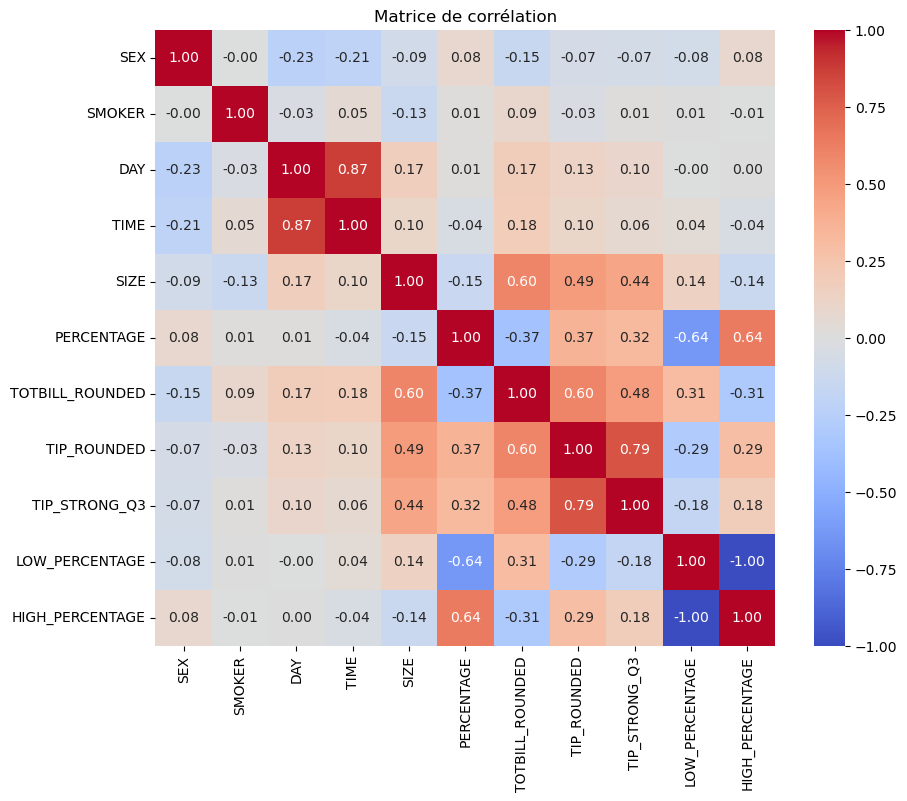

In [76]:
correlation_matrix = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de corrélation")
plt.show()

# 5. Règles d'association

In [77]:
data

,SEX,SMOKER,DAY,TIME,SIZE,PERCENTAGE,TOTBILL_ROUNDED,TIP_ROUNDED,TIP_STRONG_Q3,LOW_PERCENTAGE,HIGH_PERCENTAGE
0,1,0,6,1,2,5.944673,16.0,1.0,0,1,0
1,0,0,6,1,3,16.054159,10.0,1.5,0,0,1
2,0,0,6,1,3,16.658734,22.0,3.5,0,0,1
3,0,0,6,1,2,13.978041,24.0,3.5,0,1,0
4,1,0,6,1,4,14.680765,24.0,3.5,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
239,0,0,5,1,3,20.392697,30.0,6.0,1,0,1
240,1,1,5,1,2,7.358352,28.0,2.0,0,1,0
241,0,1,5,1,2,8.822232,22.0,2.0,0,1,0
242,0,0,5,1,2,9.820426,18.0,2.0,0,1,0


Nous allons effectuer nos analyses sur la colonne PERCENTAGE pour plusieurs raisons:

Ces valeurs nous permettent d'anonymiser les pourboires et les valeurs des factures totales

Il est important dans notre cas d'évaluer le pourcentage de tips par rapport à la facture totale car nous voulons voir le rapport de tips en fonction de la facture totale

In [78]:
data

,SEX,SMOKER,DAY,TIME,SIZE,PERCENTAGE,TOTBILL_ROUNDED,TIP_ROUNDED,TIP_STRONG_Q3,LOW_PERCENTAGE,HIGH_PERCENTAGE
0,1,0,6,1,2,5.944673,16.0,1.0,0,1,0
1,0,0,6,1,3,16.054159,10.0,1.5,0,0,1
2,0,0,6,1,3,16.658734,22.0,3.5,0,0,1
3,0,0,6,1,2,13.978041,24.0,3.5,0,1,0
4,1,0,6,1,4,14.680765,24.0,3.5,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
239,0,0,5,1,3,20.392697,30.0,6.0,1,0,1
240,1,1,5,1,2,7.358352,28.0,2.0,0,1,0
241,0,1,5,1,2,8.822232,22.0,2.0,0,1,0
242,0,0,5,1,2,9.820426,18.0,2.0,0,1,0


## 5.1 Transformation des caractéristiques et génération des transactions

On convertit les variables catégorielles en variable indicatrices pour faciliter l'analyse des règles d'association.

Chaque catégorie devient une colonne séparée avec une valeur de 0 ou 1, indiquant l'absence ou la présence de la catégorie pour chaque observation

In [79]:
data = pd.get_dummies(data, columns=["DAY","TIME","SEX","SMOKER","SIZE"], drop_first=False)

On supprime certaines colonnes pour se concentrer uniquement sur les attributs pertinants pour l'analyse des règles d'association. Nous éliminons ainsi le bruit potentiel et les redondances

In [80]:
data = data.drop(["TOTBILL_ROUNDED", "TIP_ROUNDED", "PERCENTAGE", "TIP_STRONG_Q3"], axis=1)

In [81]:
data

,LOW_PERCENTAGE,HIGH_PERCENTAGE,DAY_3,DAY_4,DAY_5,DAY_6,TIME_0,TIME_1,SEX_0,SEX_1,SMOKER_0,SMOKER_1,SIZE_1,SIZE_2,SIZE_3,SIZE_4,SIZE_5,SIZE_6
0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,0,0,0
1,0,1,0,0,0,1,0,1,1,0,1,0,0,0,1,0,0,0
2,0,1,0,0,0,1,0,1,1,0,1,0,0,0,1,0,0,0
3,1,0,0,0,0,1,0,1,1,0,1,0,0,1,0,0,0,0
4,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,0,1,0,0,1,0,0,1,1,0,1,0,0,0,1,0,0,0
240,1,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,0,0
241,1,0,0,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0
242,1,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0,0,0


In [82]:
data.columns

Index(['LOW_PERCENTAGE', 'HIGH_PERCENTAGE', 'DAY_3', 'DAY_4', 'DAY_5', 'DAY_6',
       'TIME_0', 'TIME_1', 'SEX_0', 'SEX_1', 'SMOKER_0', 'SMOKER_1', 'SIZE_1',
       'SIZE_2', 'SIZE_3', 'SIZE_4', 'SIZE_5', 'SIZE_6'],
      dtype='object')

In [83]:
transactions = []

for index, row in data.iterrows():
    transaction = []
    for col in data.columns:
        # Pour les colonnes binaires, ajoutez le nom de la caractéristique si sa valeur est 1
        if row[col] == 1:
            transaction.append(col)
    transactions.append(transaction)

# Afficher les premières transactions pour vérification
print(transactions[:5])

[['LOW_PERCENTAGE', 'DAY_6', 'TIME_1', 'SEX_1', 'SMOKER_0', 'SIZE_2'], ['HIGH_PERCENTAGE', 'DAY_6', 'TIME_1', 'SEX_0', 'SMOKER_0', 'SIZE_3'], ['HIGH_PERCENTAGE', 'DAY_6', 'TIME_1', 'SEX_0', 'SMOKER_0', 'SIZE_3'], ['LOW_PERCENTAGE', 'DAY_6', 'TIME_1', 'SEX_0', 'SMOKER_0', 'SIZE_2'], ['LOW_PERCENTAGE', 'DAY_6', 'TIME_1', 'SEX_1', 'SMOKER_0', 'SIZE_4']]


In [84]:
for transaction in transactions[:5]:
    print(transaction)

['LOW_PERCENTAGE', 'DAY_6', 'TIME_1', 'SEX_1', 'SMOKER_0', 'SIZE_2']
['HIGH_PERCENTAGE', 'DAY_6', 'TIME_1', 'SEX_0', 'SMOKER_0', 'SIZE_3']
['HIGH_PERCENTAGE', 'DAY_6', 'TIME_1', 'SEX_0', 'SMOKER_0', 'SIZE_3']
['LOW_PERCENTAGE', 'DAY_6', 'TIME_1', 'SEX_0', 'SMOKER_0', 'SIZE_2']
['LOW_PERCENTAGE', 'DAY_6', 'TIME_1', 'SEX_1', 'SMOKER_0', 'SIZE_4']


On cherche à déterminer le support minimum à utiliser pour filtrer les itemsets fréquents. Le support minimum est ajusté en fonction de la taille du dataset pour garantir la pertinance statistique des règles découvertes

In [85]:
print(len(transactions))

244


In [86]:
total_transactions = len(transactions)
min = 36
min_support = min / total_transactions
print(min_support)

0.14754098360655737


In [87]:
choix_min_support = [0.15]
print("Nombres correspondants:", [int(choix_min_support[i]*data.shape[0]) for i in range(len(choix_min_support))])

Nombres correspondants: [36]


Chaque observation du dataset est transformée en une transaction contenant les noms des caractéristiques présentes. Cela prépare les données pour l'encodage des transactions et l'analyse des itemsets fréquents

## 5.2 Application de l'algorithme Apriori pour l'analyse des règles d'association

Les transactions sont encodées pour être compatibles avec l'algorithme Apriori, qui identifie les itemsets fréquents en se basant sur le support minimum défini. C'est une étape cruciale pour découvrir les associations entre différentes caractéristiques

In [88]:
encoder = TransactionEncoder()
transactions_encoded = encoder.fit(transactions).transform(transactions)
data_encoded = pd.DataFrame(transactions_encoded, columns=encoder.columns_)

In [89]:
frequent_itemsets = apriori(data_encoded, min_support=0.15,max_len=4, use_colnames=True)
# entre 0.10 et 0.30

In [90]:
frequent_itemsets

,support,itemsets
0,0.254098,(DAY_3)
1,0.356557,(DAY_5)
2,0.311475,(DAY_6)
3,0.553279,(HIGH_PERCENTAGE)
4,0.446721,(LOW_PERCENTAGE)
...,...,...
88,0.176230,"(DAY_6, SEX_0, SMOKER_0, TIME_1)"
89,0.151639,"(HIGH_PERCENTAGE, SEX_0, SIZE_2, SMOKER_0)"
90,0.155738,"(HIGH_PERCENTAGE, SEX_0, SIZE_2, TIME_1)"
91,0.184426,"(HIGH_PERCENTAGE, SEX_0, SMOKER_0, TIME_1)"


À partir des itemsets fréquents, les règles d'association sont générées et filtrées en fonction de leur confiance et de leur lift, permettant d'identifier les associations les plus significatives

In [91]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.2)

In [92]:
rules[["antecedents", "consequents", "support", "confidence", "lift"]]

,antecedents,consequents,support,confidence,lift
0,(SIZE_2),(DAY_3),0.196721,0.307692,1.210918
1,(DAY_3),(SIZE_2),0.196721,0.774194,1.210918
2,(SMOKER_0),(DAY_3),0.184426,0.298013,1.172826
3,(DAY_3),(SMOKER_0),0.184426,0.725806,1.172826
4,(TIME_0),(DAY_3),0.250000,0.897059,3.530361
...,...,...,...,...,...
345,"(SMOKER_0, TIME_1)","(SEX_0, SIZE_2)",0.168033,0.386792,0.963034
346,(SEX_0),"(SIZE_2, TIME_1, SMOKER_0)",0.168033,0.261146,1.137853
347,(SIZE_2),"(SEX_0, SMOKER_0, TIME_1)",0.168033,0.262821,0.832834
348,(TIME_1),"(SEX_0, SIZE_2, SMOKER_0)",0.168033,0.232955,0.997209


## 5.3 Exploration et analyse des règles d'association par catégorie de pourboire

Les règles sont ensuite filtrées pour se concenterer sur celles menant à chaque catégorie de pourboire (Low, Medium, High). Cette segmentation permet une analyse ciblée sur les facteurs influençant le niveau des pourboires.

In [93]:
rules_for_high_percentage = rules[rules["consequents"].apply(lambda x: "HIGH_PERCENTAGE" in x)]
rules_for_high_percentage = rules_for_high_percentage.sort_values(by="confidence", ascending=False)

In [94]:
rules_for_high_percentage[["antecedents", "consequents", "support", "confidence", "lift"]]

,antecedents,consequents,support,confidence,lift
180,"(SIZE_2, SEX_1)",(HIGH_PERCENTAGE),0.155738,0.655172,1.184163
297,"(SEX_0, SIZE_2, SMOKER_0)",(HIGH_PERCENTAGE),0.151639,0.649123,1.173229
33,(SEX_1),(HIGH_PERCENTAGE),0.217213,0.609195,1.101064
186,"(SIZE_2, SMOKER_0)",(HIGH_PERCENTAGE),0.221311,0.600000,1.084444
35,(SIZE_2),(HIGH_PERCENTAGE),0.377049,0.589744,1.065907
40,(TIME_0),(HIGH_PERCENTAGE),0.163934,0.588235,1.063181
168,"(SEX_0, SMOKER_0)",(HIGH_PERCENTAGE),0.233607,0.587629,1.062085
325,"(SEX_0, SMOKER_0, TIME_1)",(HIGH_PERCENTAGE),0.184426,0.584416,1.056277
131,"(DAY_6, TIME_1)",(HIGH_PERCENTAGE),0.180328,0.578947,1.046394
20,(DAY_6),(HIGH_PERCENTAGE),0.180328,0.578947,1.046394


In [95]:
print(len(rules_for_high_percentage))

60


In [96]:
rules_for_low_percentage = rules[rules["consequents"].apply(lambda x: "LOW_PERCENTAGE" in x)]
rules_for_low_percentage = rules_for_low_percentage.sort_values(by="confidence", ascending=False)

In [97]:
rules_for_low_percentage[["antecedents", "consequents", "support", "confidence", "lift"]]

,antecedents,consequents,support,confidence,lift
221,"(SEX_0, TIME_1)",(LOW_PERCENTAGE),0.254098,0.500000,1.119266
9,(DAY_5),(LOW_PERCENTAGE),0.172131,0.482759,1.080671
101,"(TIME_1, DAY_5)",(LOW_PERCENTAGE),0.172131,0.482759,1.080671
103,(DAY_5),"(LOW_PERCENTAGE, TIME_1)",0.172131,0.482759,1.454236
44,(SEX_0),(LOW_PERCENTAGE),0.307377,0.477707,1.069362
53,(TIME_1),(LOW_PERCENTAGE),0.331967,0.460227,1.030234
50,(SMOKER_1),(LOW_PERCENTAGE),0.172131,0.451613,1.010950
208,"(SEX_0, SIZE_2)",(LOW_PERCENTAGE),0.180328,0.448980,1.005055
48,(SMOKER_0),(LOW_PERCENTAGE),0.274590,0.443709,0.993256
233,"(SMOKER_0, TIME_1)",(LOW_PERCENTAGE),0.184426,0.424528,0.950320


## 5.4 Interprétation des règles